In [103]:
import warnings
warnings.filterwarnings('ignore')

#definindo imports
from sklearn.base import BaseEstimator, ClassifierMixin
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.metrics import accuracy_score

from scipy.sparse import coo_matrix
from sklearn.utils import shuffle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

In [104]:
# To plot pretty figures
%matplotlib inline
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [105]:
#CRIAÇÃO DAS BASES DE DADOS

# teste 1 - tudo default
X, y = make_classification(random_state = 42)
linearly_separable_teste_1 = (X, y)

# teste 2 - copia do https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state = 42, n_clusters_per_class=1)
rng = np.random.RandomState(42)
X += 2 * rng.uniform(size=X.shape)
linearly_separable_teste_2 = (X, y)

# teste 3 - aumentando número de amostras
X, y = make_classification(n_samples = 5000, random_state = 42)
linearly_separable_teste_3 = (X, y)

# teste 4 - aumentando número de amostras e features
X, y = make_classification(n_samples = 5000, n_features = 30, random_state = 42)
linearly_separable_teste_4 = (X, y)

# teste 5 - aumentando número de amostras e features, mas diminuindo o class_sep
X, y = make_classification(n_samples = 5000, n_features = 30, class_sep = 0.8, random_state = 42)
linearly_separable_teste_5 = (X, y)

datasets = [
    linearly_separable_teste_1,
    linearly_separable_teste_2,
    linearly_separable_teste_3,
    linearly_separable_teste_4,
    linearly_separable_teste_5
]

In [106]:
def plot(x,y):
    plt.plot(x, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([0, 5.5, 0, 1.1])
    plt.show()

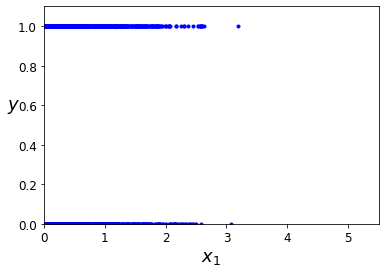

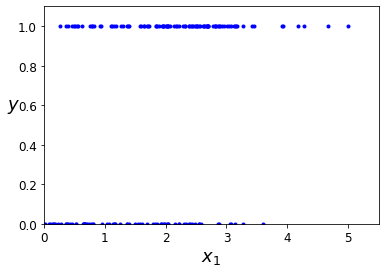

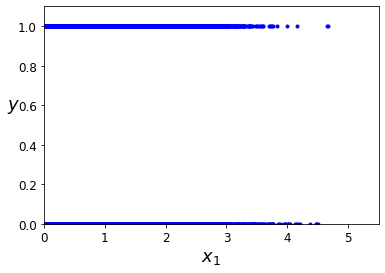

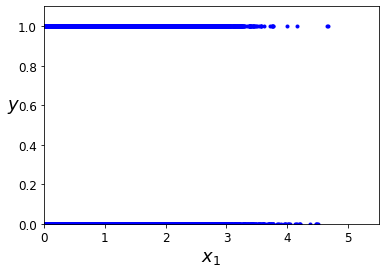

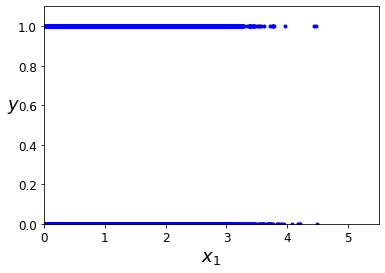

In [107]:
plot(linearly_separable_teste_1[0], linearly_separable_teste_1[1])
plot(linearly_separable_teste_2[0], linearly_separable_teste_2[1])
plot(linearly_separable_teste_3[0], linearly_separable_teste_3[1])
plot(linearly_separable_teste_4[0], linearly_separable_teste_4[1])
plot(linearly_separable_teste_5[0], linearly_separable_teste_5[1])

# DEFINE O ARRAY DE CLASSIFICADORES

In [108]:
# CRIAÇÃO DOS CLASSIFICADORES
# Aqui é criado um classificador onde o parametro que irá variar na execução é o ETA0, asism é criado uma classificador para cada função de custo para classificadores SGD
# ‘hinge’, ‘log’, ‘modified_huber’, ‘squared_hinge’, ‘perceptron’,

from sklearn.linear_model import SGDClassifier

classificadores = [
    ("SGD - HINGE", SGDClassifier(learning_rate = 'constant', eta0 = 1, max_iter = 1000, random_state = 42, n_jobs = -1, loss = 'hinge')),
    ("SGD - LOG", SGDClassifier(learning_rate = 'constant', eta0 = 1, max_iter = 1000, random_state = 42, n_jobs = -1, loss = 'log')),
    ("SGD - MODIFIED HUBER", SGDClassifier(learning_rate = 'constant', eta0 = 1, max_iter = 1000, random_state = 42, n_jobs = -1, loss = 'modified_huber')),
    ("SGD - SQUARED HINGE", SGDClassifier(learning_rate = 'constant', eta0 = 1, max_iter = 1000, random_state = 42, n_jobs = -1, loss = 'squared_hinge')),
    ("SGD - PERCEPTRON", SGDClassifier(learning_rate = 'constant', eta0 = 1, max_iter = 1000, random_state = 42, n_jobs = -1, loss = 'perceptron'))
]

In [109]:
def executa_teste(dataset):
    
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    for tupla in classificadores:
        lista_eta0 = [0.001, 0.05, 0.1]
        scores = []
        for n_eta0 in lista_eta0:
            tupla[1].set_params(eta0 = n_eta0)
            tupla[1].fit(X_train, y_train)
            scores.append(tupla[1].score(X_test, y_test))

        plt.title("{}".format(tupla[0]))
        plt.xlabel("eta0")
        plt.ylabel("score")
        plt.plot(n_iters, scores)
        plt.show()            


# BASE DE DADOS NÚMERO 1

Em todos os gráficos podemos ver a variação na performance que é causada ao variamos o parâmetro eta0.
Os valores utilizados foram 0.001 0.05 e 0.1

Foi gerado um gráfico para cada função de custo, e em cada gráfico, variou-se o parâmetro eta0 com os valores já citados.

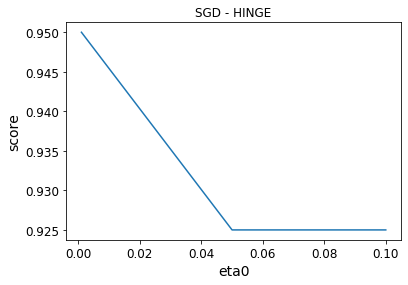

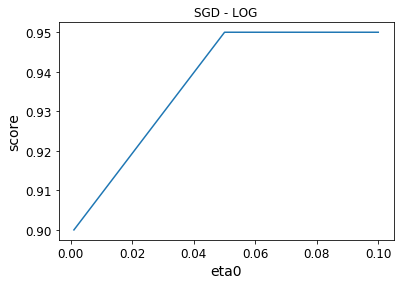

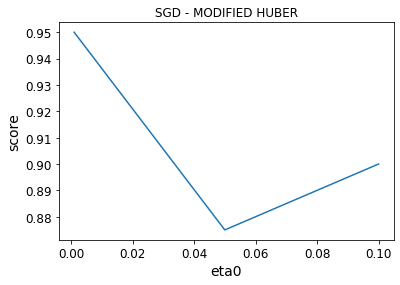

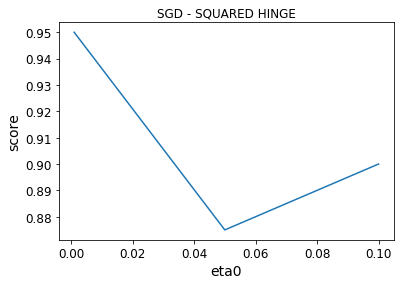

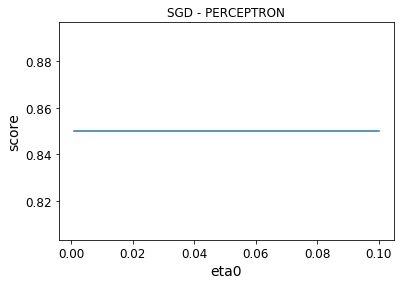

In [110]:
executa_teste(linearly_separable_teste_1)

# BASE DE DADOS NÚMERO 2

Em todos os gráficos podemos ver a variação na performance que é causada ao variamos o parâmetro eta0.
Os valores utilizados foram 0.001 0.05 e 0.1

Foi gerado um gráfico para cada função de custo, e em cada gráfico, variou-se o parâmetro eta0 com os valores já citados.

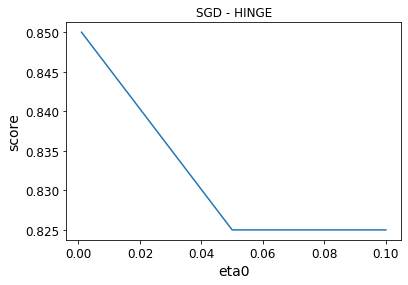

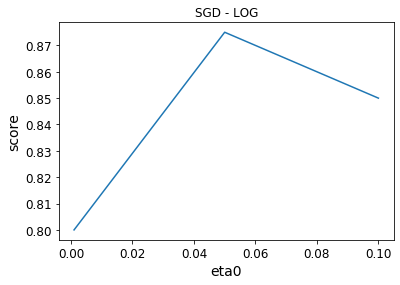

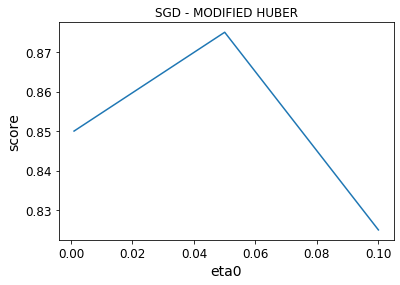

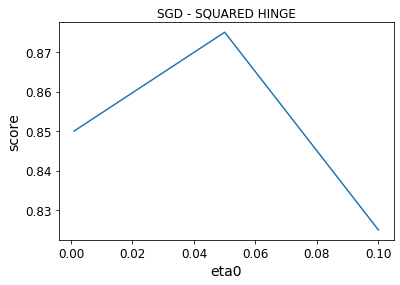

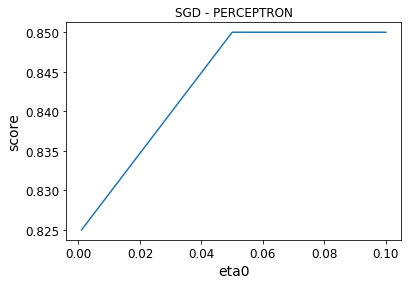

In [111]:
executa_teste(linearly_separable_teste_2)

# BASE DE DADOS NÚMERO 3

Em todos os gráficos podemos ver a variação na performance que é causada ao variamos o parâmetro eta0.
Os valores utilizados foram 0.001 0.05 e 0.1

Foi gerado um gráfico para cada função de custo, e em cada gráfico, variou-se o parâmetro eta0 com os valores já citados.

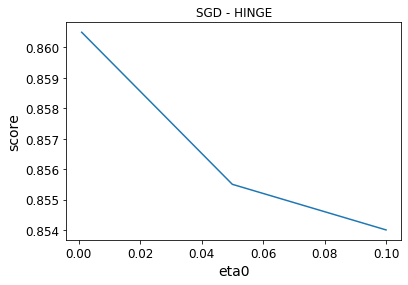

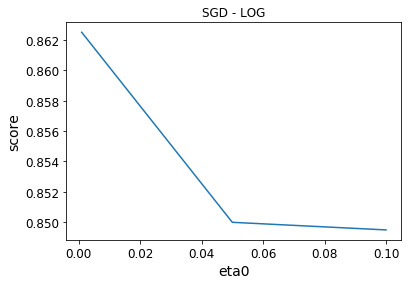

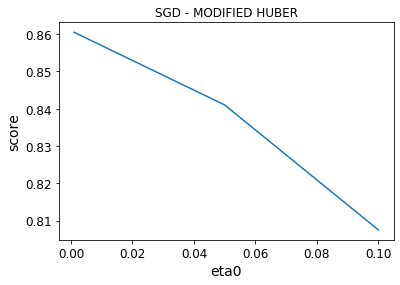

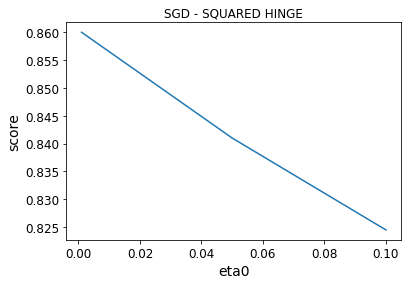

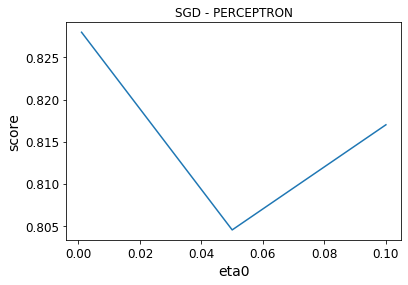

In [112]:
executa_teste(linearly_separable_teste_3)

# BASE DE DADOS NÚMERO 4

Em todos os gráficos podemos ver a variação na performance que é causada ao variamos o parâmetro eta0.
Os valores utilizados foram 0.001 0.05 e 0.1

Foi gerado um gráfico para cada função de custo, e em cada gráfico, variou-se o parâmetro eta0 com os valores já citados.

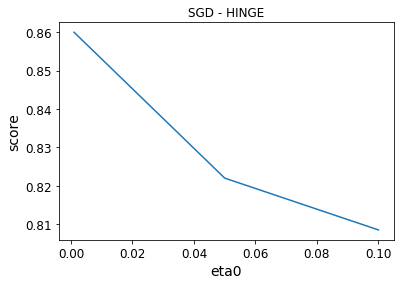

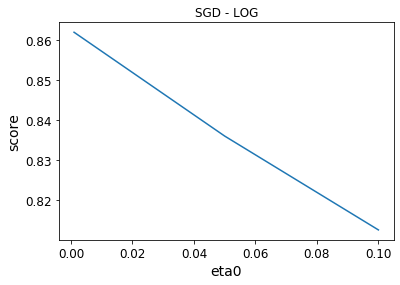

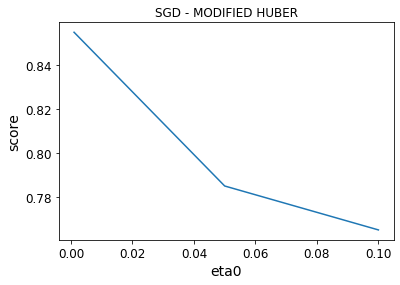

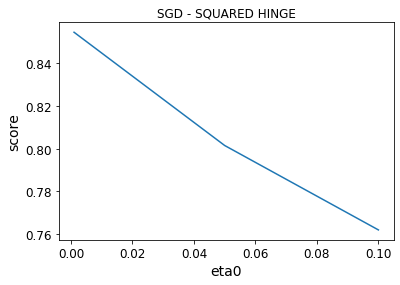

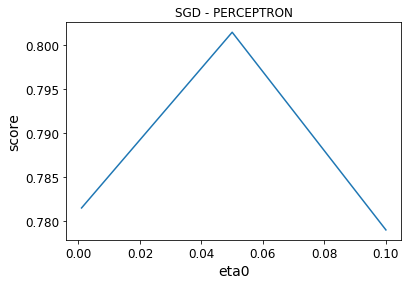

In [113]:
executa_teste(linearly_separable_teste_4)

# BASE DE DADOS NÚMERO 5

Em todos os gráficos podemos ver a variação na performance que é causada ao variamos o parâmetro eta0.
Os valores utilizados foram 0.001 0.05 e 0.1

Foi gerado um gráfico para cada função de custo, e em cada gráfico, variou-se o parâmetro eta0 com os valores já citados.

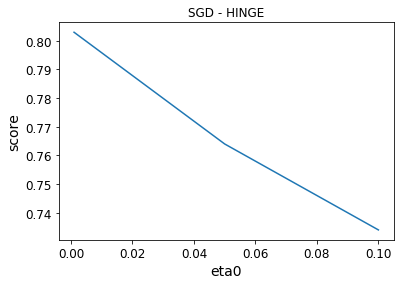

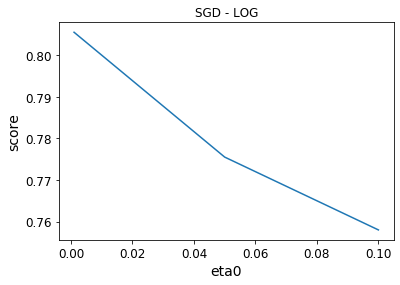

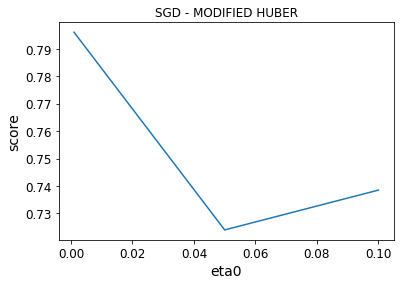

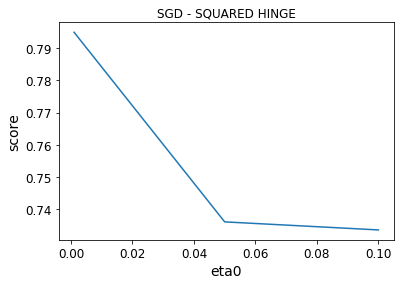

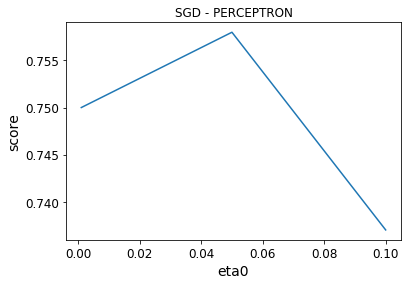

In [114]:
executa_teste(linearly_separable_teste_5)

# DISCUSSÃO

Como o exemplo solicitado pelo professor foi uma classificação, optamos por variar o parâmetro eta0 do classificador SGD e visualizar os impactos que isso traria na performance, comparando 5 bases de dados diferentes. Dessa forma, para cada base de dados, são executados 5 classificadores, cada um com uma função de custo diferente, e cada classificador é executado 3 vezes, variando-se o parâmetro eta0.

As observações foram as seguintes:

1. Em todas as bases de dados, a função de custo hinge perdeu performance conforme o aumento de valor do parâmetro eta0.
2. O comportamento das funções de custo log e modified huber variaram de acordo com a base de dados, assim o parametro eta0 impacta de forma diferente a depender dos dados.
3. De uma forma geral, a função de custo squared hinge obteve um comportamento um tanto quanto parecido ao da função modified huber, com uma leve variação.
4. De todas as funções de custo testadas, a perceptron obteve as menores performances e comportamento mais diverso em relação às bases de dados.